# Buy or Sell
Testing known methods on Microsoft, Apple and HP Stockprice to see if they work. Obviously just using 3 Stocks is not statisticly significant, but testing it on hundreds or thousands of stocks takes to long/ Visualizing takes a lot of space, which was a Priority to me.

# Imports

In [1]:
import math
import pandas as pd
import numpy as np
import datetime as dt
import statistics

import pandas_datareader as web

#plot
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
plt.style.use("fivethirtyeight")

print("Import successful")

#if you don't like the warnings
# import warnings
# warnings.filterwarnings("ignore")

Import successful


# Data

## Microsoft
I will all Microsoft MS not MSFT

In [2]:
dfMS=web.DataReader("MSFT", data_source="yahoo", start="2010-01-01", end = "2020-09-01")
dfMS.drop(["High", "Low", "Open", "Volume", "Close"], axis=1, inplace=True)
dfMS.head()

,Adj Close
Date,
2010-01-04,24.105360
2010-01-05,24.113148
2010-01-06,23.965164
2010-01-07,23.715933
2010-01-08,23.879499


Text(0, 0.5, 'Adj Close Prtice USD ($)')

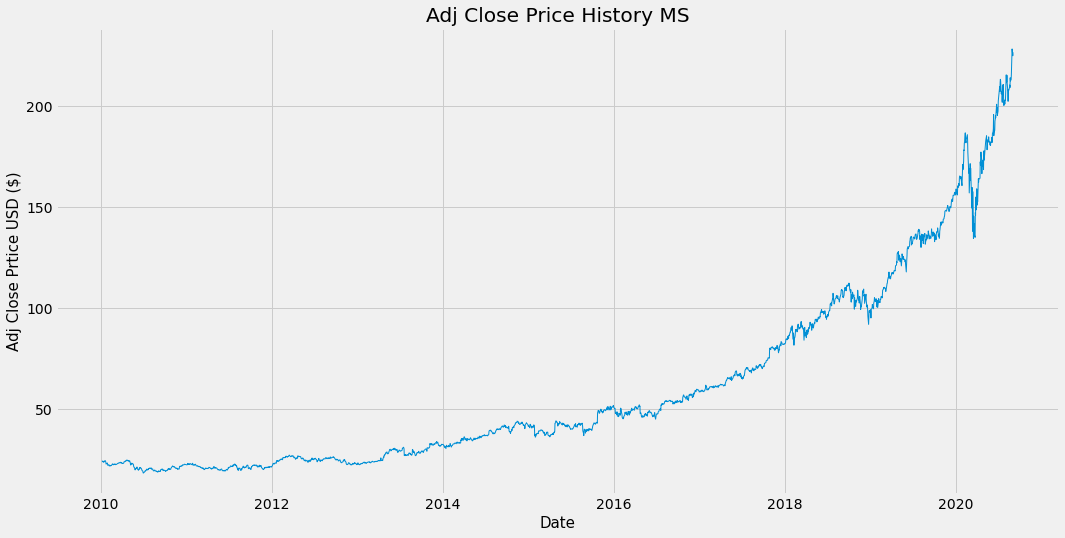

In [3]:
plt.figure(figsize=(16,8))
plt.title("Adj Close Price History MS")
plt.plot(dfMS["Adj Close"],linewidth=1)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)

## Apple

In [4]:
dfA=web.DataReader("AAPL", data_source="yahoo", start="2010-01-01", end = "2020-09-01")
dfA.drop(["High", "Low", "Open", "Volume", "Close"], axis=1, inplace=True)
dfA.head()

,Adj Close
Date,
2010-01-04,6.539882
2010-01-05,6.551187
2010-01-06,6.446983
2010-01-07,6.435065
2010-01-08,6.477847


Text(0, 0.5, 'Adj Close Prtice USD ($)')

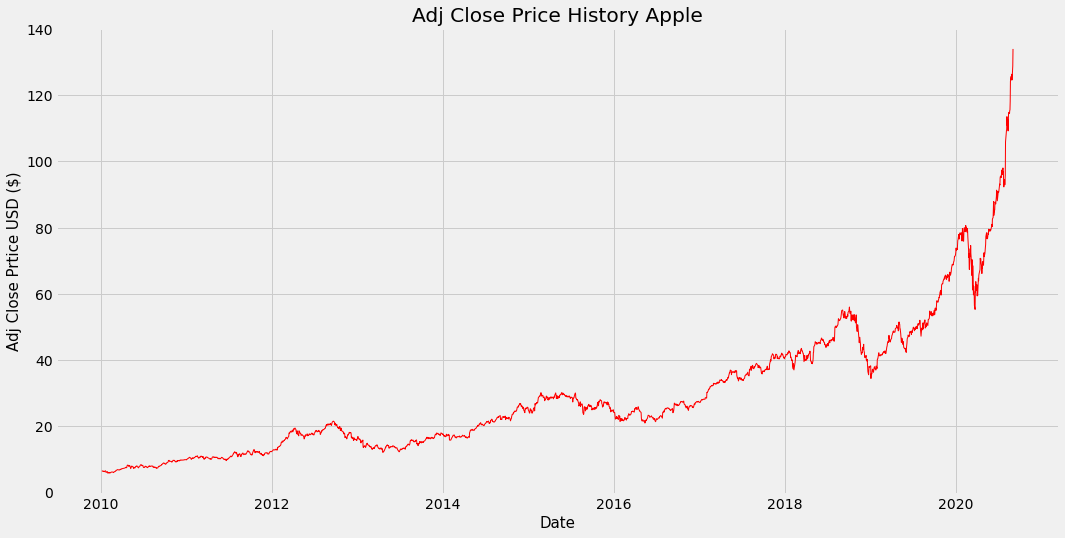

In [5]:
plt.figure(figsize=(16,8))
plt.title("Adj Close Price History Apple")
plt.plot(dfA["Adj Close"],linewidth=1, color="red")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)

## HP

In [6]:
dfHP=web.DataReader("HP", data_source="yahoo", start="2010-01-01", end = "2020-09-01")
dfHP.drop(["High", "Low", "Open", "Volume", "Close"], axis=1, inplace=True)
dfHP.head()

,Adj Close
Date,
2010-01-04,27.837137
2010-01-05,29.461746
2010-01-06,30.535982
2010-01-07,30.728279
2010-01-08,31.829037


Text(0, 0.5, 'Adj Close Prtice USD ($)')

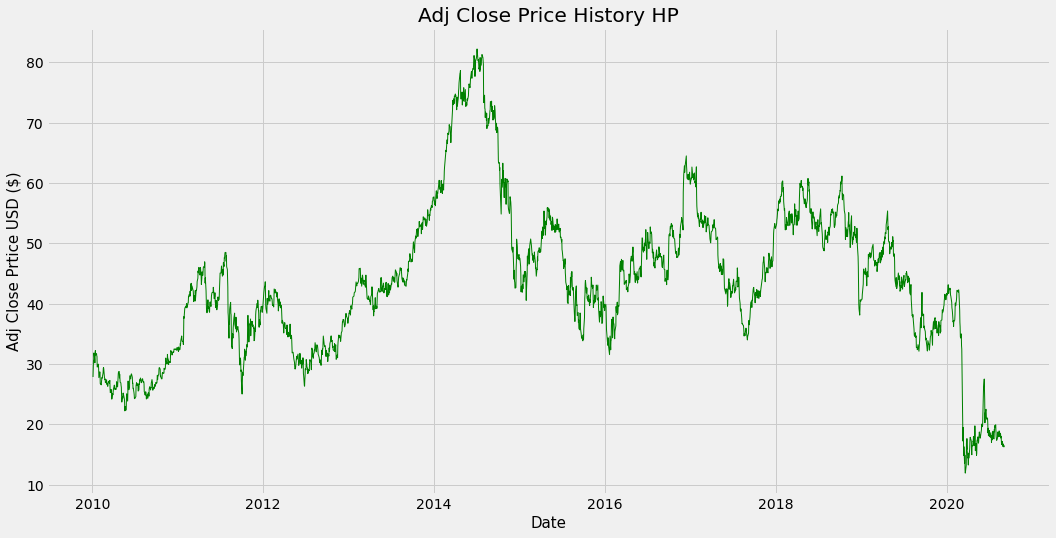

In [7]:
plt.figure(figsize=(16,8))
plt.title("Adj Close Price History HP")
plt.plot(dfHP["Adj Close"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)

## all Data

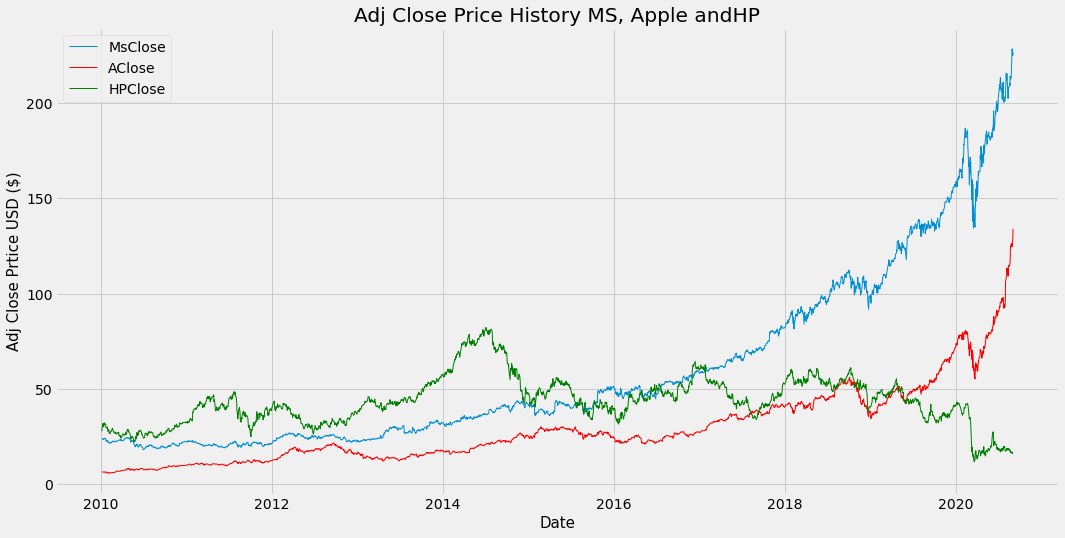

In [8]:
plt.figure(figsize=(16,8))
plt.title("Adj Close Price History MS, Apple andHP")
plt.plot(dfMS["Adj Close"],linewidth=1)
plt.plot(dfA["Adj Close"],linewidth=1, color="red")
plt.plot(dfHP["Adj Close"],linewidth=1, color="g")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["MsClose","AClose","HPClose"], loc="upper left")

It is easy to see, that the stocks don't perform the same, which is good, because I want to test the Methods on different data.

# Methods
searching methods online and testing them.
1. How to Interpret and Use Moving Averages in Trading
2. Best MACD trading strategies 1

# 1. How to Interpret and Use Moving Averages in Trading
https://www.dummies.com/personal-finance/investing/stocks-trading/how-to-interpret-and-use-moving-averages-in-trading/

"One simple mechanical strategy that some traders employ works like this:

- Buy when the moving average slopes upward and the closing price crosses above the moving average.

- Close the position when the price closes below the moving average.

- Sell short when the moving average slopes downward and the closing price crosses below the moving average.

- Close the short position when the price closes above the moving average.
"

Notes:
- Not sure how long the SMA is(found 5 days, 30, 60...) and performance should vary if we change the length

# 1.1 methods for everyone

In [9]:
def slopeUp(dfSMA, i):# check if stock is moving upwards  (ugly)
    if dfSMA[i]>dfSMA[i-2]>dfSMA[i-3]>dfSMA[i-4]>dfSMA[i-5]:
        return True
    elif dfSMA[i]>dfSMA[i-1]>dfSMA[i-3]>dfSMA[i-4]>dfSMA[i-5]:
        return True
    elif dfSMA[i]>dfSMA[i-1]>dfSMA[i-2]>dfSMA[i-4]>dfSMA[i-5]:
        return True
    elif dfSMA[i]>dfSMA[i-1]>dfSMA[i-2]>dfSMA[i-3]>dfSMA[i-5]:
        return True
    elif dfSMA[i]>dfSMA[i-1]>dfSMA[i-2]>dfSMA[i-3]>dfSMA[i-4]:
        return True
    return False

In [10]:
def slopeDown(dfSMA, i):# check if stock is moving downwards  (ugly)
    if dfSMA[i]<dfSMA[i-2]<dfSMA[i-3]<dfSMA[i-4]<dfSMA[i-5]:
        return True
    elif dfSMA[i]<dfSMA[i-1]<dfSMA[i-3]<dfSMA[i-4]<dfSMA[i-5]:
        return True
    elif dfSMA[i]<dfSMA[i-1]<dfSMA[i-2]<dfSMA[i-4]<dfSMA[i-5]:
        return True
    elif dfSMA[i]<dfSMA[i-1]<dfSMA[i-2]<dfSMA[i-3]<dfSMA[i-5]:
        return True
    elif dfSMA[i]<dfSMA[i-1]<dfSMA[i-2]<dfSMA[i-3]<dfSMA[i-4]:
        return True
    return False

# 2. How to Interpret and Use Moving Averages in Trading(Zero crosses)
https://www.ig.com/en-ch/trading-strategies/macd-trading-strategy-190610#:~:text=The%20strategy%20is%20to%20buy,the%20signals%20issued%20too%20late

The strategy is to buy – or close a short position – when the MACD crosses above the zero line, and sell – or close a long position – when the MACD crosses below the zero line.

I only focused on the buy/sell side
 
Notes:
- Depends on the choices of the length of the moving averages

## 2.1 methods for everyone

In [15]:
def MACD(DF,short, long, signal):# 12,26, 9 are standards
    df=DF.copy()
    df["MAFast"]=df["Adj Close"].ewm(span=short, min_periods=short).mean()
    df["MASlow"]=df["Adj Close"].ewm(span=long, min_periods=long).mean()
    df["MACD"]=df["MAFast"]-df["MASlow"]
    df["SignalLine"]=df["MACD"].ewm(span=signal, min_periods=signal).mean()
    df.dropna(inplace=True)
    return df

In [16]:
# Parameters
Short=12
Long=26
Signal=9

In [17]:
def MACDZero(df):
    start=26
    buy=[]
    sell=[]
    for _ in range(start):
        buy.append(np.nan)
        sell.append(np.nan)
    above=None # 1 above -1 below
    for i in range(start,df.shape[0]):
        # above 0
        if (above!=1 and df["MACD"][i]>0):
            buy.append(df["Adj Close"][i])
            sell.append(np.nan)
            above=1
                
        # below 0  
        elif (above!=-1 and df["MACD"][i]<0):
            buy.append(np.nan)
            sell.append(df["Adj Close"][i])
            above=-1
            
        #do nothing
        else:
            sell.append(np.nan)
            buy.append(np.nan)
            
    return buy, sell

In [18]:
def createLog(df):# creating a shortened log of the price when we bought/sold...
    bought=[df["Adj Close"][x] for x in df.index if not math.isnan(df["Buy"][x])]
    sold=[df["Adj Close"][x] for x in df.index if not math.isnan(df["Sell"][x])]
#     shorted=[df["Adj Close"][x] for x in df.index if not math.isnan(df["Short"][x])]
#     boughtback=[df["Adj Close"][x] for x in df.index if not math.isnan(df["Buyback"][x])]
    return bought, sold #, shorted, boughtback
# could have just used the lists from above this is just for demonstration

## 2.2.1 Microsoft

In [19]:
MACDMS=MACD(dfMS,Short, Long, Signal) # automaticlly crates a copy()
MACDMS.head()

,Adj Close,MAFast,MASlow,MACD,SignalLine
Date,,,,,
2010-02-22,22.480949,22.290110,22.436085,-0.145975,-0.246587
2010-02-23,22.167955,22.271262,22.414782,-0.143520,-0.223494
2010-02-24,22.402702,22.291533,22.413828,-0.122294,-0.201352
2010-02-25,22.379232,22.305053,22.411107,-0.106054,-0.180886
2010-02-26,22.434010,22.324928,22.412900,-0.087973,-0.161222


In [20]:
MSBought, MSSold=MACDZero(MACDMS)
MACDMS["Buy"]=MSBought
MACDMS["Sell"]=MSSold

MACDMS.head()

,Adj Close,MAFast,MASlow,MACD,SignalLine,Buy,Sell
Date,,,,,,,
2010-02-22,22.480949,22.290110,22.436085,-0.145975,-0.246587,NaN,NaN
2010-02-23,22.167955,22.271262,22.414782,-0.143520,-0.223494,NaN,NaN
2010-02-24,22.402702,22.291533,22.413828,-0.122294,-0.201352,NaN,NaN
2010-02-25,22.379232,22.305053,22.411107,-0.106054,-0.180886,NaN,NaN
2010-02-26,22.434010,22.324928,22.412900,-0.087973,-0.161222,NaN,NaN


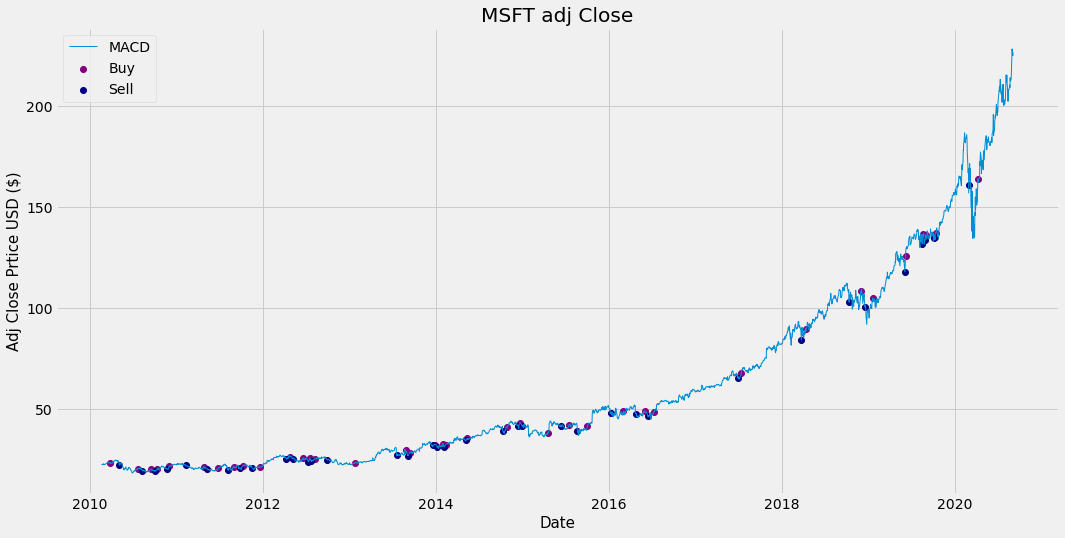

In [21]:
plt.figure(figsize=(16,8))
plt.title("MSFT adj Close")

plt.plot(MACDMS["Adj Close"],linewidth=1)
plt.scatter(MACDMS.index,MACDMS["Buy"], color="purple",linewidth=1)
plt.scatter(MACDMS.index,MACDMS["Sell"], color="navy",linewidth=1)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["MACD","Buy", "Sell"], loc="upper left")

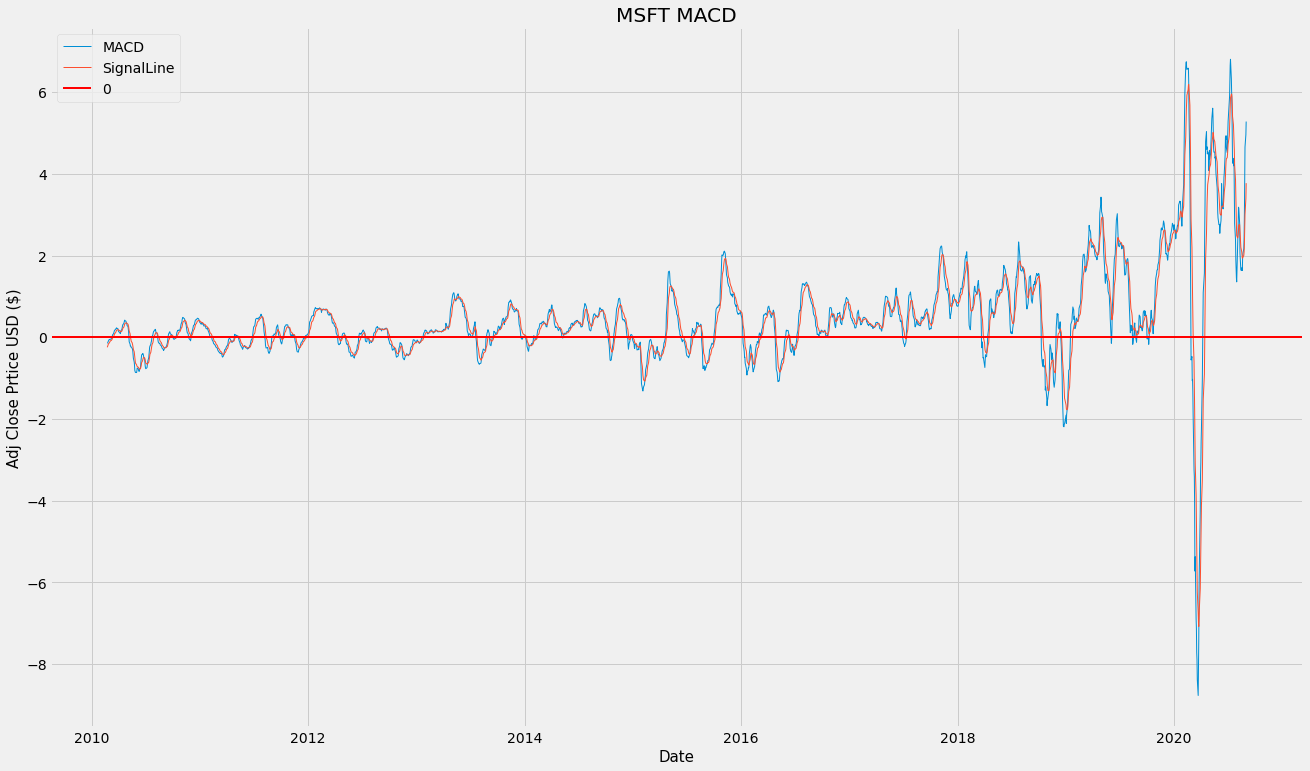

In [22]:
plt.figure(figsize=(20,12))
plt.title("MSFT MACD")

plt.plot(MACDMS["MACD"],linewidth=1)
plt.plot(MACDMS["SignalLine"],linewidth=1)

plt.axhline(linewidth=2, color='r')

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["MACD","SignalLine","0"], loc="upper left")

Signal line + MACD behave similarly

In [23]:
MSBought, MSSold=createLog(MACDMS)# could have just used the lists from above
# this is just for demonstration

In [24]:
made=statistics.mean(MSSold)-statistics.mean(MSBought)
print(made)

-0.8316391238316854


In [25]:
netgain=made
print("we gained {:.2f} $ using this method with Microsoft.".format(netgain))

we gained -0.83 $ using this method with Microsoft.


It is notable, that we still have the stock, and we make a big  profit from the last part

## 2.2.1 Apple

In [26]:
MACDA=MACD(dfA,Short, Long, Signal) # automaticlly crates a copy()
MACDA.head()

,Adj Close,MAFast,MASlow,MACD,SignalLine
Date,,,,,
2010-02-22,6.124587,6.120038,6.137306,-0.017269,-0.037346
2010-02-23,6.021911,6.104898,6.128139,-0.023241,-0.034185
2010-02-24,6.131923,6.109066,6.128438,-0.019372,-0.030944
2010-02-25,6.172870,6.118902,6.131932,-0.013030,-0.027097
2010-02-26,6.252933,6.139558,6.141403,-0.001845,-0.021753


In [27]:
ABought, ASold=MACDZero(MACDA)
MACDA["Buy"]=ABought
MACDA["Sell"]=ASold

MACDA.head()

,Adj Close,MAFast,MASlow,MACD,SignalLine,Buy,Sell
Date,,,,,,,
2010-02-22,6.124587,6.120038,6.137306,-0.017269,-0.037346,NaN,NaN
2010-02-23,6.021911,6.104898,6.128139,-0.023241,-0.034185,NaN,NaN
2010-02-24,6.131923,6.109066,6.128438,-0.019372,-0.030944,NaN,NaN
2010-02-25,6.172870,6.118902,6.131932,-0.013030,-0.027097,NaN,NaN
2010-02-26,6.252933,6.139558,6.141403,-0.001845,-0.021753,NaN,NaN


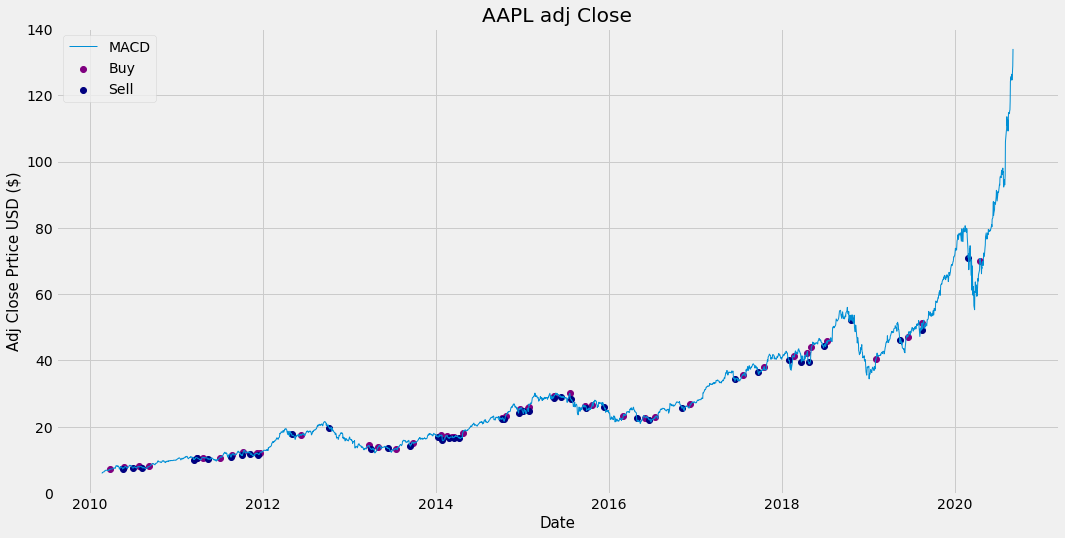

In [28]:
plt.figure(figsize=(16,8))
plt.title("AAPL adj Close")

plt.plot(MACDA["Adj Close"],linewidth=1)
plt.scatter(MACDA.index,MACDA["Buy"], color="purple",linewidth=1)
plt.scatter(MACDA.index,MACDA["Sell"], color="navy",linewidth=1)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["MACD","Buy", "Sell"], loc="upper left")

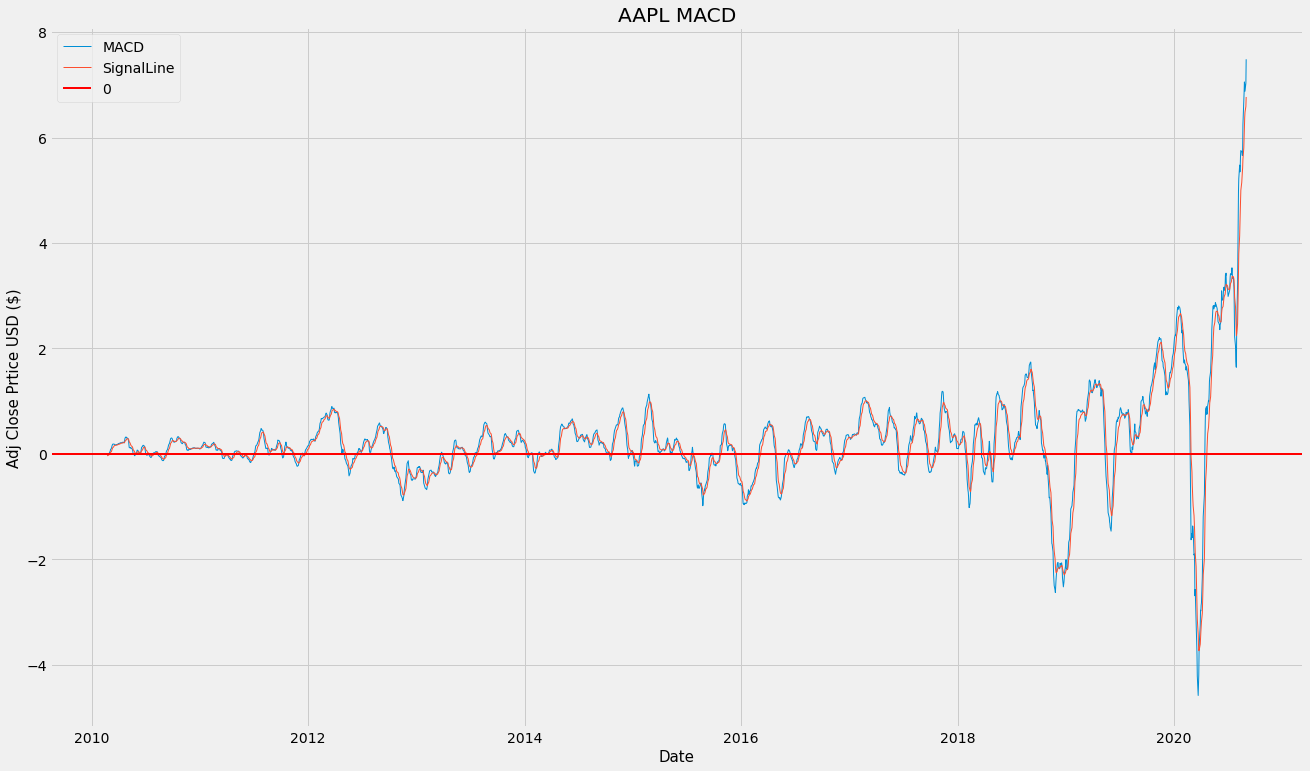

In [29]:
plt.figure(figsize=(20,12))
plt.title("AAPL MACD")

plt.plot(MACDA["MACD"],linewidth=1)
plt.plot(MACDA["SignalLine"],linewidth=1)

plt.axhline(linewidth=2, color='r')

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["MACD","SignalLine","0"], loc="upper left")

In [30]:
ABought, ASold=createLog(MACDA)# could have just used the lists from above

In [31]:
made=statistics.mean(ASold)-statistics.mean(ABought)
print(made)

0.11967837382068325


In [32]:
netgain=made
print("we gained {:.2f} $ using this method with Apple.".format(netgain))

we gained 0.12 $ using this method with Apple.


## 2.2.1 HP

In [33]:
MACDHP=MACD(dfHP,Short, Long, Signal) # automaticlly crates a copy()
MACDHP.head()

,Adj Close,MAFast,MASlow,MACD,SignalLine
Date,,,,,
2010-02-22,27.712059,28.358853,28.622651,-0.263798,-0.418186
2010-02-23,27.612471,28.243692,28.542395,-0.298703,-0.391415
2010-02-24,27.373465,28.109483,28.450023,-0.340540,-0.380284
2010-02-25,27.479677,28.012389,28.373721,-0.361332,-0.376214
2010-02-26,26.902081,27.841273,28.258525,-0.417253,-0.384899


In [34]:
HPBought, HPSold=MACDZero(MACDHP)
MACDHP["Buy"]=HPBought
MACDHP["Sell"]=HPSold

MACDHP.head()

,Adj Close,MAFast,MASlow,MACD,SignalLine,Buy,Sell
Date,,,,,,,
2010-02-22,27.712059,28.358853,28.622651,-0.263798,-0.418186,NaN,NaN
2010-02-23,27.612471,28.243692,28.542395,-0.298703,-0.391415,NaN,NaN
2010-02-24,27.373465,28.109483,28.450023,-0.340540,-0.380284,NaN,NaN
2010-02-25,27.479677,28.012389,28.373721,-0.361332,-0.376214,NaN,NaN
2010-02-26,26.902081,27.841273,28.258525,-0.417253,-0.384899,NaN,NaN


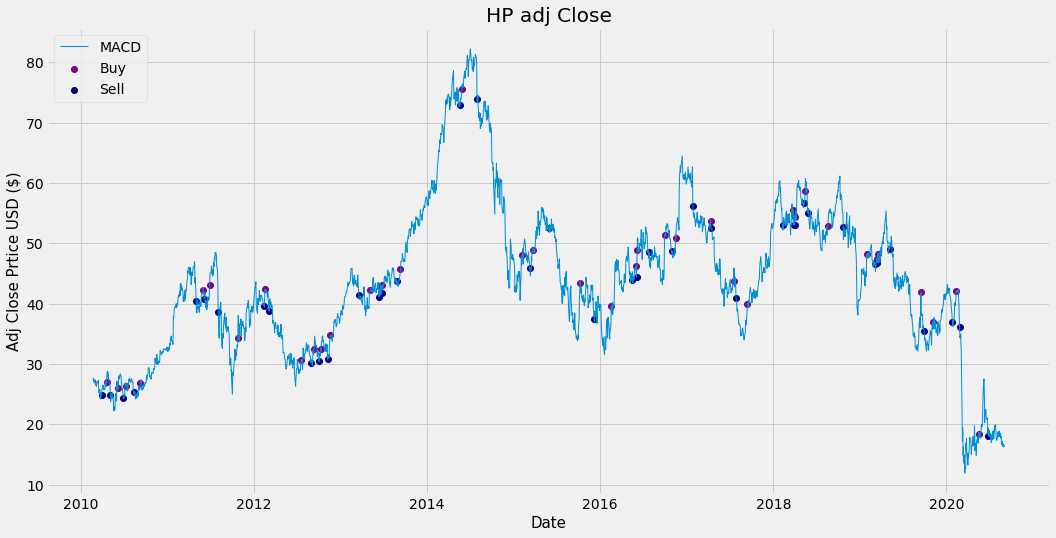

In [35]:
plt.figure(figsize=(16,8))
plt.title("HP adj Close")

plt.plot(MACDHP["Adj Close"],linewidth=1)
plt.scatter(MACDHP.index,MACDHP["Buy"], color="purple",linewidth=1)
plt.scatter(MACDHP.index,MACDHP["Sell"], color="navy",linewidth=1)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["MACD","Buy", "Sell"], loc="upper left")

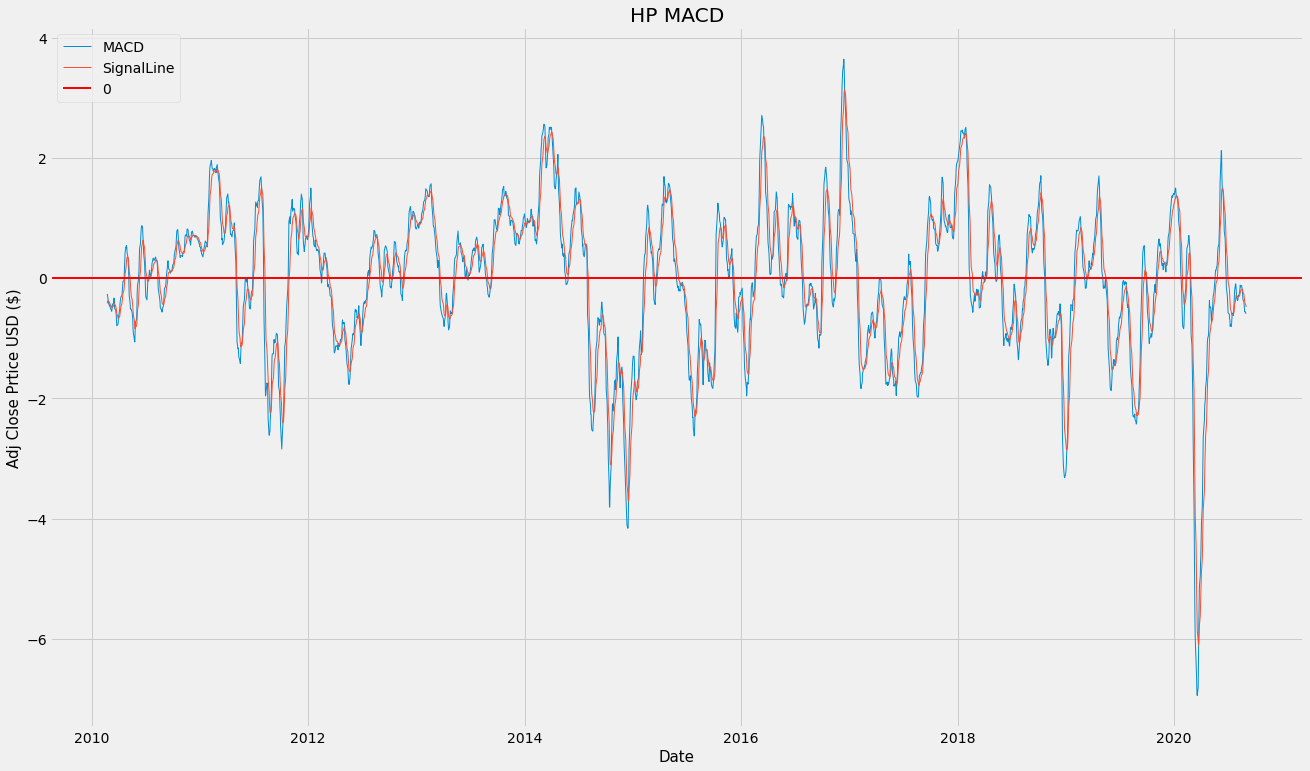

In [36]:
plt.figure(figsize=(20,12))
plt.title("HP MACD")

plt.plot(MACDHP["MACD"],linewidth=1)
plt.plot(MACDHP["SignalLine"],linewidth=1)

plt.axhline(linewidth=2, color='r')

plt.xlabel("Date", fontsize=15)
plt.ylabel("Adj Close Prtice USD ($)", fontsize=15)
plt.legend(["MACD","SignalLine","0"], loc="upper left")

In [37]:
HPBought, HPSold=createLog(MACDA)# could have just used the lists from above

In [38]:
made=statistics.mean(HPSold)-statistics.mean(HPBought)
print(made)

0.11967837382068325


In [39]:
netgain=made
print("we gained {:.2f} $ using this method with Apple.".format(netgain))

we gained 0.12 $ using this method with Apple.


# 2.4 Analysis/Feedback

This method, or my execution of it does not seem to work that well. Especially if we add the cost for transactions the method is a waste of time and money. It might work better wen not looking at daily data, but for example 5 min updates.<br>
(It is possible, that I messed up some lines, but the results are not very good.) <br>
<br>